In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import matplotlib.colors
import matplotlib.colors as c
import pandas as pd
import matplotlib.colors as mcolors
from skimage import color
from skimage import io



In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [3]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
  #  print(labels)
    counts = Counter(labels)
 #   print(counts)
    center_colors = clf.cluster_centers_
  #  print(center_colors)
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    

    return hex_colors, #ordered_colors, rgb_colors 

In [5]:
centroids = get_colors(get_image('fantasia.png'), 10, True)


KeyboardInterrupt: 

In [ ]:
print(centroids)

# creazione palettes

In [39]:
def to_image(pixel):
    return [[pixel]]

def to_pixel(image):
    return image[0][0]

def convert_rgb2lab(rgb_pixel):
    return to_pixel(color.rgb2lab(to_image(rgb_pixel)))

In [50]:
#CSS_RGB_COLORS = [mcolors.hex2color(c) for c in mcolors.CSS4_COLORS]

CSS_RGB_COLORS = [mcolors.hex2color(c) for c in CSS_ELENA]

CSS_LAB_COLORS = [convert_rgb2lab(c) for c in CSS_RGB_COLORS]

BASE_RGB_COLORS = [[float(v) for v in c] for c in mcolors.BASE_COLORS.values()]

BASE_LAB_COLORS = [convert_rgb2lab(c) for c in BASE_RGB_COLORS]

TABLEAU_RGB_COLORS = [mcolors.hex2color(c) for c in mcolors.TABLEAU_COLORS]

TABLEAU_LAB_COLORS = [convert_rgb2lab(c) for c in TABLEAU_RGB_COLORS]

In [51]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [52]:
def get_image(image_path):
    image = cv2.imread(image_path)
    #image = io.imread(image_path)
#     if np.shape(image) == ():
#         print(np.shape(image))
#         print(image, ' è un numpy vuoto')
#         return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [53]:
def get_centroids_base_colors(image, number_of_colors=10, show_chart=True):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]

    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    #rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    lab_colors = [convert_rgb2lab(p) for p in ordered_colors]
    
    centroids_df = pd.DataFrame()
    
    for i in range(number_of_colors):
        c_dict = {}
        rgb_c = ordered_colors[i]
        c_dict['centroid'] = rgb_c
        
        nearest_base_color = 0
        lab_c = lab_colors[i]
        
        min_distance = deltaE_cie76(lab_c, CSS_LAB_COLORS[0])
        nearest_base_color_index = 0
        
        i = 1
        for c in CSS_LAB_COLORS[1:]:
            tmp_distance = deltaE_cie76(lab_c, c)
            if (tmp_distance < min_distance):
                min_distance = tmp_distance
                nearest_base_color = i
            i += 1
                
        c_dict['nearest_base_color'] = CSS_RGB_COLORS[nearest_base_color]
        
        centroids_df = centroids_df.append(c_dict, ignore_index=True)
        nearest_base_colors_rgbs = centroids_df['nearest_base_color']
        nearest_base_colors_hex = [mcolors.rgb2hex(c) for c in nearest_base_colors_rgbs] 
    
    if (show_chart):
        plt.figure(figsize = (16, 6))
        fig_dims = (1, 2)
        ax_1 = plt.subplot2grid(fig_dims, (0, 0))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        ax_1 = plt.subplot2grid(fig_dims, (0, 1))
        plt.pie(counts.values(), labels = nearest_base_colors_hex, colors = nearest_base_colors_rgbs)
            
    return centroids_df

In [ ]:
#get_centroids_base_colors(get_image('fantasia.png'), show_chart=True)

# Fantasia Tableau

# 200 immagini 

In [11]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\1940-Fantasia-resized\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output (1).png
output (10).png
output (100).png
output (101).png
output (102).png
output (103).png
output (104).png
output (105).png
output (106).png
output (107).png
output (108).png
output (109).png
output (11).png
output (110).png
output (111).png
output (112).png
output (113).png
output (114).png
output (115).png
output (116).png
output (117).png
output (118).png
output (119).png
output (12).png
output (120).png
output (121).png
output (122).png
output (123).png
output (124).png
output (125).png
output (126).png
output (127).png
output (128).png
output (129).png
output (13).png
output (130).png
output (131).png
output (132).png
output (133).png
output (134).png
output (135).png
output (136).png
output (137).png
output (138).png
output (139).png
output (14).png
output (140).png
output (141).png
output (142).png
output (143).png
output (144).png
output (145).png
output (146).png
output (147).png
output (148).png
output (149).png
output (15).png
output (150).png
output (151).png
outpu

C:\Users\Attilio\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


IndexError: list index out of range

In [12]:
centroids_df.head()

,centroid,nearest_base_color
0,"[0.02474046817938497, 0.1318182236734363, 0.29...","(0.12156862745098039, 0.4666666666666667, 0.70..."
1,"[0.01942536219366863, 0.19205481514947126, 0.3...","(0.12156862745098039, 0.4666666666666667, 0.70..."
2,"[0.01926596637232087, 0.19866019382650163, 0.4...","(0.12156862745098039, 0.4666666666666667, 0.70..."
3,"[0.022291658174011252, 0.24317598141123828, 0....","(0.12156862745098039, 0.4666666666666667, 0.70..."
4,"[0.01638885170328182, 0.16616027561461133, 0.4...","(0.12156862745098039, 0.4666666666666667, 0.70..."


In [13]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df['nearest_base_color']]


In [14]:
centroids_df['nearest_base_color_hex'].value_counts()


#8c564b    479
#1f77b4    296
#7f7f7f    256
#9467bd    145
#bcbd22     58
#d62728     29
#ff7f0e     11
#e377c2     11
#17becf      8
#2ca02c      7
Name: nearest_base_color_hex, dtype: int64

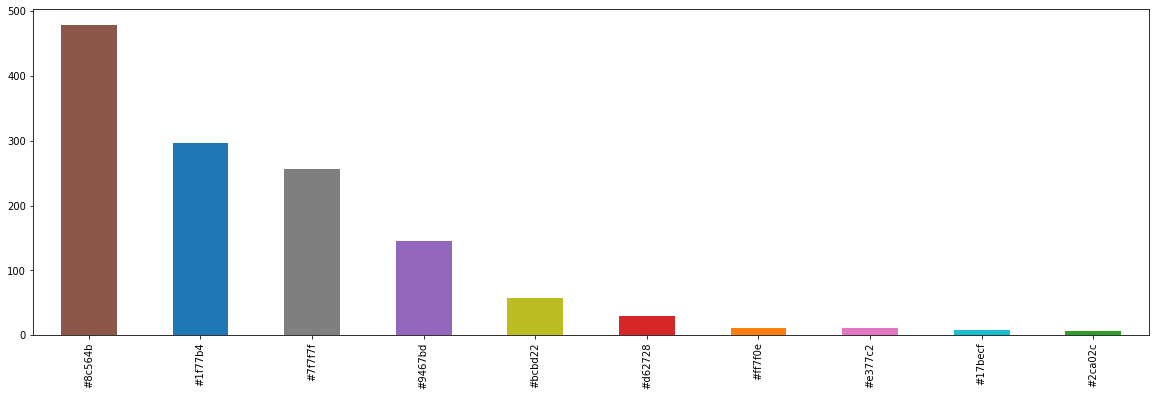

In [15]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df['nearest_base_color_hex'].value_counts().index))
plt.show()

# 100 immagini

In [44]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\1940-Fantasia-resized1\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output (10).png


KeyboardInterrupt: 

In [57]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df_1['nearest_base_color']]

In [58]:
centroids_df['nearest_base_color_hex'].value_counts()


#8c564b    5
#d62728    3
#7f7f7f    2
Name: nearest_base_color_hex, dtype: int64

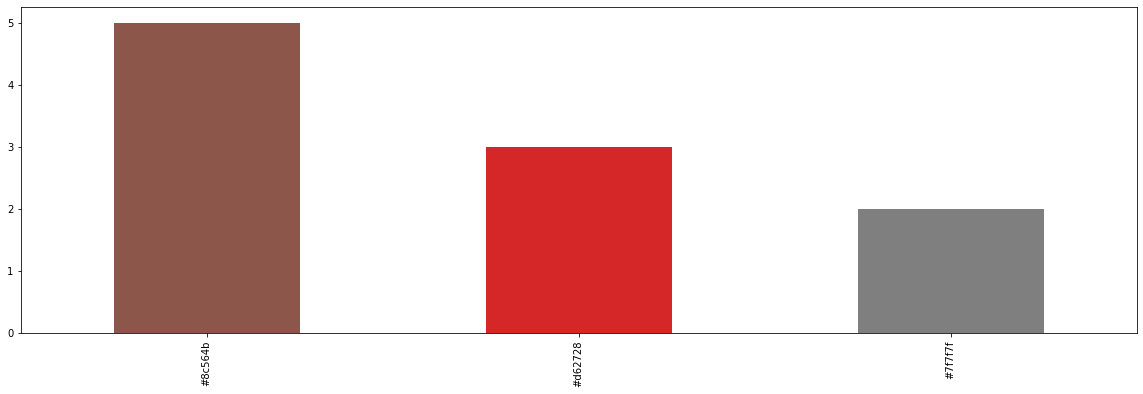

In [24]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df_1['nearest_base_color_hex'].value_counts().index))
plt.show()

# 45 immagini css_elena

In [45]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\1940-Fantasia-resized2\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df2= centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output (120).png
output (122).png
output (125).png
output (127).png
output (133).png
output (138).png
output (139).png
output (140).png
output (142).png
output (143).png
output (152).png
output (154).png
output (155).png
output (156).png
output (157).png
output (169).png
output (170).png
output (171).png
output (173).png
output (174).png
output (175).png
output (176).png
output (178).png
output (179).png
output (195).png
output (206).png
output (207).png
output (209).png
output (211).png
output (212).png
output (213).png
output (214).png
output (215).png
output (220).png
output (47).png
output (5).png
output (57).png
output (61).png
output (69).png
output (73).png
output (83).png


C:\Users\Attilio\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


IndexError: list index out of range

In [54]:
centroids_df2['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df2['nearest_base_color']]

In [55]:
centroids_df2['nearest_base_color_hex'].value_counts()


#800080    4
#b22222    3
#696969    2
#000000    1
Name: nearest_base_color_hex, dtype: int64

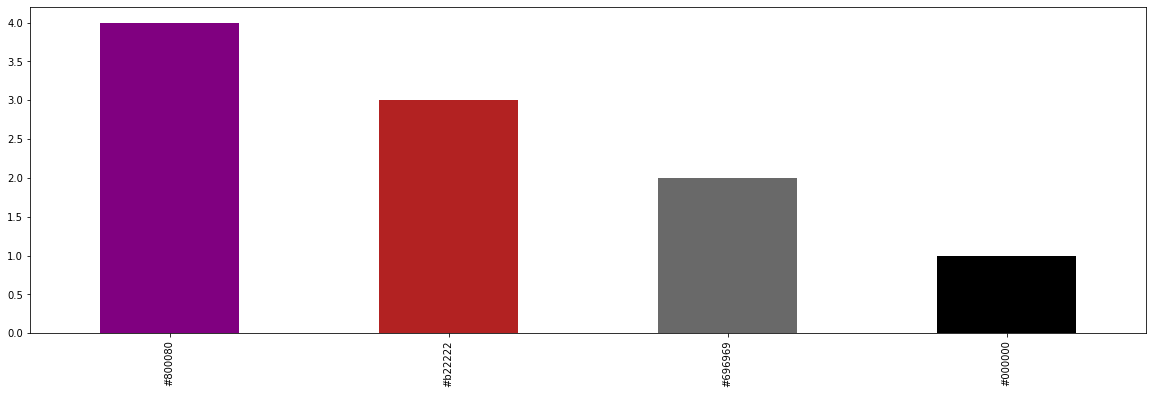

In [56]:
plt.figure(figsize = (20, 6))
centroids_df2['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df2['nearest_base_color_hex'].value_counts().index))
plt.show()

# 45 immagini css

In [31]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\1940-Fantasia-resized2\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df_2 = centroids_df.append(get_centroids_base_colors_css(get_image(directory+f), show_chart=False))

output (120).png
output (122).png
output (125).png
output (127).png
output (133).png
output (138).png
output (139).png
output (140).png
output (142).png
output (143).png
output (152).png
output (154).png
output (155).png
output (156).png
output (157).png
output (169).png
output (170).png
output (171).png
output (173).png
output (174).png
output (175).png
output (176).png
output (178).png
output (179).png
output (195).png
output (206).png
output (207).png
output (209).png
output (211).png
output (212).png
output (213).png
output (214).png
output (215).png
output (220).png
output (47).png
output (5).png
output (57).png
output (61).png
output (69).png
output (73).png
output (83).png


C:\Users\Attilio\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


IndexError: list index out of range

In [32]:
centroids_df_2['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df_2['nearest_base_color']]

In [33]:
centroids_df_2['nearest_base_color_hex'].value_counts()

#000000    8
#2f4f4f    1
#5f9ea0    1
Name: nearest_base_color_hex, dtype: int64

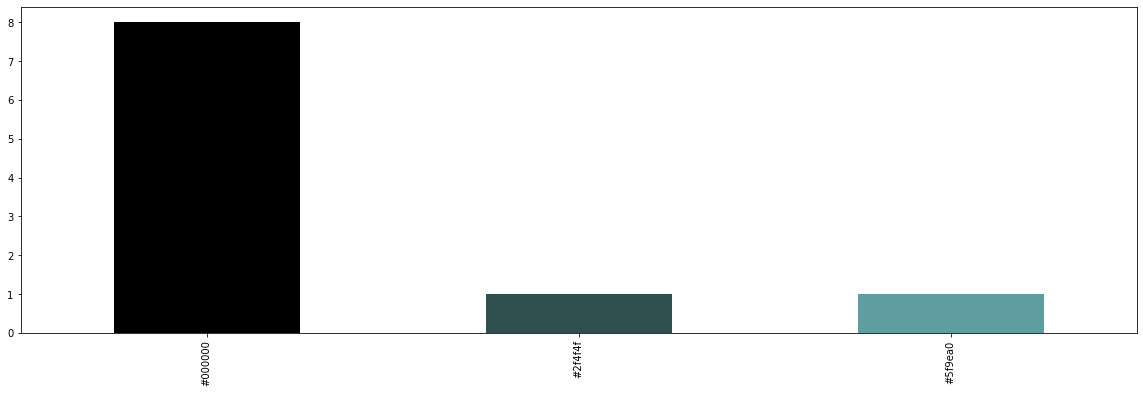

In [34]:
plt.figure(figsize = (20, 6))
centroids_df_2['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df_2['nearest_base_color_hex'].value_counts().index))
plt.show()

In [35]:
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [36]:
CSS_ELLY = ['black','dimgray','silver','white','rosybrown','firebrick','maroon','red','salmon','orangered','sienna','chocolate','peru','darkorange','tan','papayawhip','orange','gold','darkkhaki','yellow','darkolivegreen','darkseagreen','palegreen','limegreen','darkgreen','springgreen','aquamarine','turquoise','darkslategray','steelblue','navy','mediumslateblue','indigo','darkviolet','violet','blue','purple','deeppink','crimson','pink']

In [37]:
CSS_ELENA = {}
for x in CSS_ELLY:
    CSS_ELENA[x] = mcolors.CSS4_COLORS[x]
        

In [38]:
CSS_ELENA

{'black': '#000000',
 'dimgray': '#696969',
 'silver': '#C0C0C0',
 'white': '#FFFFFF',
 'rosybrown': '#BC8F8F',
 'firebrick': '#B22222',
 'maroon': '#800000',
 'red': '#FF0000',
 'salmon': '#FA8072',
 'orangered': '#FF4500',
 'sienna': '#A0522D',
 'chocolate': '#D2691E',
 'peru': '#CD853F',
 'darkorange': '#FF8C00',
 'tan': '#D2B48C',
 'papayawhip': '#FFEFD5',
 'orange': '#FFA500',
 'gold': '#FFD700',
 'darkkhaki': '#BDB76B',
 'yellow': '#FFFF00',
 'darkolivegreen': '#556B2F',
 'darkseagreen': '#8FBC8F',
 'palegreen': '#98FB98',
 'limegreen': '#32CD32',
 'darkgreen': '#006400',
 'springgreen': '#00FF7F',
 'aquamarine': '#7FFFD4',
 'turquoise': '#40E0D0',
 'darkslategray': '#2F4F4F',
 'steelblue': '#4682B4',
 'navy': '#000080',
 'mediumslateblue': '#7B68EE',
 'indigo': '#4B0082',
 'darkviolet': '#9400D3',
 'violet': '#EE82EE',
 'blue': '#0000FF',
 'purple': '#800080',
 'deeppink': '#FF1493',
 'crimson': '#DC143C',
 'pink': '#FFC0CB'}

# 200 immagini css elena

In [49]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\1940-Fantasia-resized\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df2= centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output (1).png
output (10).png
output (100).png
output (101).png
output (102).png
output (103).png
output (104).png
output (105).png
output (106).png
output (107).png
output (108).png
output (109).png
output (11).png


KeyboardInterrupt: 